In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [71]:
pl_ug_iitm = pd.read_excel(open('Placement_ug4yrs.xlsx','rb'),sheet_name="1_iitm")
pl_ug_iitd = pd.read_excel(open('Placement_ug4yrs.xlsx','rb'),sheet_name="2_iitd")
pl_ug_iitb = pd.read_excel(open('Placement_ug4yrs.xlsx','rb'),sheet_name="3_iitb")
pl_ug_iitk = pd.read_excel(open('Placement_ug4yrs.xlsx','rb'),sheet_name="4_iitk")
pl_ug_iitkh = pd.read_excel(open('Placement_ug4yrs.xlsx','rb'),sheet_name="5_iitkh")


# 1. UG Placements

In [72]:
pl_ug_iitm

,Unnamed: 0,Academic Year,No. of first year\nstudents intake in the\nyear,No. of first year\nstudents admitted in\nthe year,Academic Year.1,No. of students\nadmitted through\nLateral entry,Academic Year.2,No. of students\ngraduating in\nminimum stipulated\ntime,No. of students\nplaced,Median salary of\nplaced\ngraduates(Amount in\nRs.),No. of students\nselected for Higher\nStudies
0,1,2014-15,466,441,2015-16,0,2017-18,334,283,1306000,51
1,2,2015-16,466,458,2016-17,0,2018-19,362,268,1360000,65
2,3,2016-17,466,465,2017-18,0,2019-20,374,286,1500000,43


In [73]:
pl_ug_iitm.columns

Index(['Unnamed: 0', 'Academic Year',
       'No. of first year\nstudents intake in the\nyear',
       'No. of first year\nstudents admitted in\nthe year', 'Academic Year.1',
       'No. of students\nadmitted through\nLateral entry', 'Academic Year.2',
       'No. of students\ngraduating in\nminimum stipulated\ntime',
       'No. of students\nplaced',
       'Median salary of\nplaced\ngraduates(Amount in\nRs.)',
       'No. of students\nselected for Higher\nStudies'],
      dtype='object')

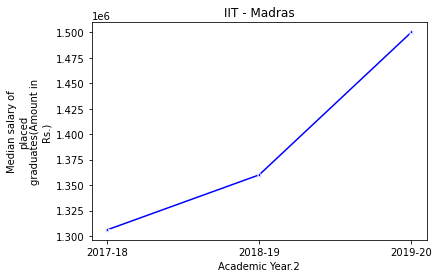

In [105]:
sns.lineplot(x=pl_ug_iitm['Academic Year.2'],y=pl_ug_iitm['Median salary of\nplaced\ngraduates(Amount in\nRs.)'],
             marker='*',color='blue')
plt.title('IIT - Madras')
plt.show()

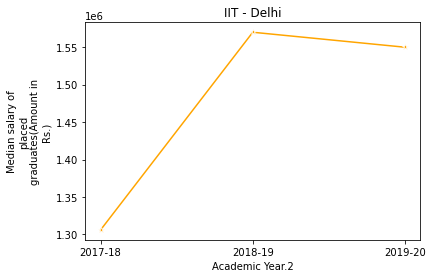

In [106]:
sns.lineplot(x=pl_ug_iitd['Academic Year.2'],y=pl_ug_iitd['Median salary of\nplaced\ngraduates(Amount in\nRs.)'],
             marker='*',color='orange')
plt.title('IIT - Delhi')
plt.show()

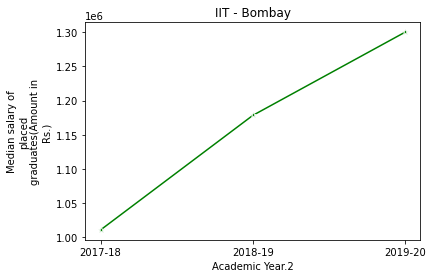

In [107]:
sns.lineplot(x=pl_ug_iitb['Academic Year.2'],y=pl_ug_iitb['Median salary of\nplaced\ngraduates(Amount in\nRs.)'],
             marker='*',color='green')
plt.title('IIT - Bombay')
plt.show()

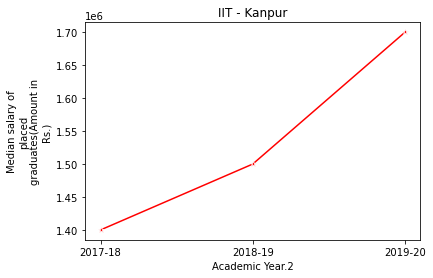

In [108]:
sns.lineplot(x=pl_ug_iitk['Academic Year.2'],y=pl_ug_iitk['Median salary of\nplaced\ngraduates(Amount in\nRs.)'],
             marker='*',color='red')
plt.title('IIT - Kanpur')
plt.show()

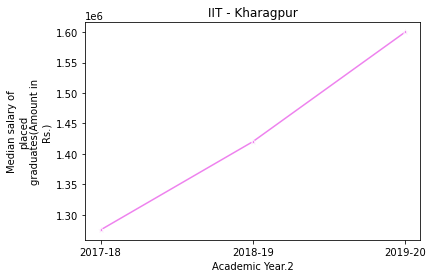

In [109]:
sns.lineplot(x=pl_ug_iitkh['Academic Year.2'],y=pl_ug_iitkh['Median salary of\nplaced\ngraduates(Amount in\nRs.)'],
             marker='*',color='violet')
plt.title('IIT - Kharagpur')
plt.show()

In [79]:
pl_ug_iitm.columns

Index(['Unnamed: 0', 'Academic Year',
       'No. of first year\nstudents intake in the\nyear',
       'No. of first year\nstudents admitted in\nthe year', 'Academic Year.1',
       'No. of students\nadmitted through\nLateral entry', 'Academic Year.2',
       'No. of students\ngraduating in\nminimum stipulated\ntime',
       'No. of students\nplaced',
       'Median salary of\nplaced\ngraduates(Amount in\nRs.)',
       'No. of students\nselected for Higher\nStudies'],
      dtype='object')

In [80]:
sal_m = pl_ug_iitm[['Academic Year.2','Median salary of\nplaced\ngraduates(Amount in\nRs.)']]
sal_d = pl_ug_iitd[['Academic Year.2','Median salary of\nplaced\ngraduates(Amount in\nRs.)']]
sal_b = pl_ug_iitb[['Academic Year.2','Median salary of\nplaced\ngraduates(Amount in\nRs.)']]
sal_k = pl_ug_iitk[['Academic Year.2','Median salary of\nplaced\ngraduates(Amount in\nRs.)']]
sal_kh = pl_ug_iitkh[['Academic Year.2','Median salary of\nplaced\ngraduates(Amount in\nRs.)']]

In [81]:
temp=pd.merge(left=sal_m, right=sal_d,how='inner',on='Academic Year.2',suffixes=('_Madras','_Delhi'))
temp.rename(columns={'Median salary of\nplaced\ngraduates(Amount in\nRs.)_Madras' : 'Madras',
                    'Median salary of\nplaced\ngraduates(Amount in\nRs.)_Delhi' : 'Delhi'},inplace=True)
temp=pd.merge(left=temp, right=sal_b,how='inner',on='Academic Year.2',suffixes=(None,'_Bombay'))
temp.rename(columns={'Median salary of\nplaced\ngraduates(Amount in\nRs.)' : 'Bombay'},inplace=True)
temp=pd.merge(left=temp, right=sal_k,how='inner',on='Academic Year.2',suffixes=(None,'_Kanpur'))
temp.rename(columns={'Median salary of\nplaced\ngraduates(Amount in\nRs.)' : 'Kanpur'},inplace=True)
salary_ug = pd.merge(left=temp, right=sal_kh,how='inner',on='Academic Year.2',suffixes=(None,'_Kharagpur'))
salary_ug.rename(columns={'Median salary of\nplaced\ngraduates(Amount in\nRs.)' : 'Kharagpur'},inplace=True)

In [82]:
salary_ug.set_index(keys='Academic Year.2',inplace=True)

<Figure size 1080x360 with 0 Axes>

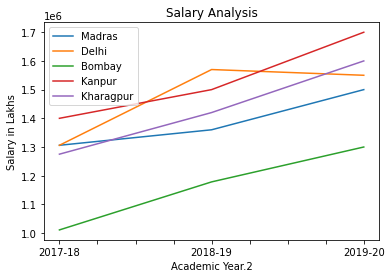

In [88]:
plt.figure(figsize=[15,5])
salary_ug.plot(kind='line')
plt.title('Salary Analysis')
plt.ylabel('Salary in Lakhs')
plt.show()

# 2. PG Placements

In [89]:
pl_pg_iitm = pd.read_excel(open('Placement_pg2yrs.xlsx','rb'),sheet_name="1_iitm")
pl_pg_iitd = pd.read_excel(open('Placement_pg2yrs.xlsx','rb'),sheet_name="2_iitd")
pl_pg_iitb = pd.read_excel(open('Placement_pg2yrs.xlsx','rb'),sheet_name="3_iitb")
pl_pg_iitk = pd.read_excel(open('Placement_pg2yrs.xlsx','rb'),sheet_name="4_iitk")
pl_pg_iitkh = pd.read_excel(open('Placement_pg2yrs.xlsx','rb'),sheet_name="5_iitkh")


In [90]:
pl_pg_iitm

,Unnamed: 0,Academic Year,No. of first year\nstudents intake in the\nyear,No. of first year\nstudents admitted in\nthe year,Academic Year.1,No. of students graduating in minimum\nstipulated time,No. of students\nplaced,Median salary of\nplaced\ngraduates(Amount in\nRs.),No. of students\nselected for Higher\nStudies
0,1,2016-17,382,456,2017-18,320,289,875000,15
1,2,2017-18,429,485,2018-19,459,373,1100000,21
2,3,2018-19,403,411,2019-20,302,213,1200000,26


In [91]:
pgsal_m = pl_pg_iitm[['Academic Year.1','Median salary of\nplaced\ngraduates(Amount in\nRs.)']]
pgsal_d = pl_pg_iitd[['Academic Year.1','Median salary of\nplaced\ngraduates(Amount in\nRs.)']]
pgsal_b = pl_pg_iitb[['Academic Year.1','Median salary of\nplaced\ngraduates(Amount in\nRs.)']]
pgsal_k = pl_pg_iitk[['Academic Year.1','Median salary of\nplaced\ngraduates(Amount in\nRs.)']]
pgsal_kh = pl_pg_iitkh[['Academic Year.1','Median salary of\nplaced\ngraduates(Amount in\nRs.)']]

In [92]:
temp=pd.merge(left=pgsal_m, right=pgsal_d,how='inner',on='Academic Year.1',suffixes=('_Madras','_Delhi'))
temp.rename(columns={'Median salary of\nplaced\ngraduates(Amount in\nRs.)_Madras' : 'Madras',
                    'Median salary of\nplaced\ngraduates(Amount in\nRs.)_Delhi' : 'Delhi'},inplace=True)
temp=pd.merge(left=temp, right=pgsal_b,how='inner',on='Academic Year.1',suffixes=(None,'_Bombay'))
temp.rename(columns={'Median salary of\nplaced\ngraduates(Amount in\nRs.)' : 'Bombay'},inplace=True)
temp=pd.merge(left=temp, right=pgsal_k,how='inner',on='Academic Year.1',suffixes=(None,'_Kanpur'))
temp.rename(columns={'Median salary of\nplaced\ngraduates(Amount in\nRs.)' : 'Kanpur'},inplace=True)
salary_pg = pd.merge(left=temp, right=pgsal_kh,how='inner',on='Academic Year.1',suffixes=(None,'_Kharagpur'))
salary_pg.rename(columns={'Median salary of\nplaced\ngraduates(Amount in\nRs.)' : 'Kharagpur'},inplace=True)

In [94]:
salary_pg.set_index(keys='Academic Year.1',inplace=True)

<Figure size 1080x360 with 0 Axes>

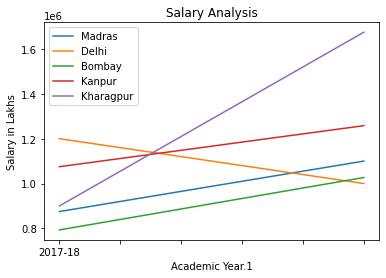

In [95]:
plt.figure(figsize=[15,5])
salary_pg.plot(kind='line')
plt.title('Salary Analysis')
plt.ylabel('Salary in Lakhs')
plt.show()

In [96]:
salary_pg

,Madras,Delhi,Bombay,Kanpur,Kharagpur
Academic Year.1,,,,,
2017-18,875000,1200000,793047,1075000,900000
2018-19,1100000,1000000,1026708,1258000,1674733


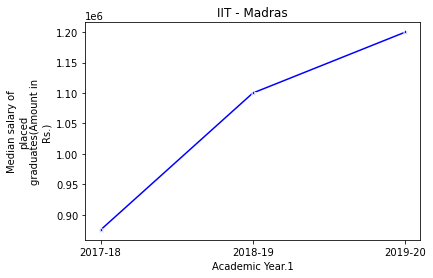

In [99]:
sns.lineplot(x=pl_pg_iitm['Academic Year.1'],y=pl_pg_iitm['Median salary of\nplaced\ngraduates(Amount in\nRs.)'],
             marker='*',color='blue')
plt.title('IIT - Madras')
plt.show()

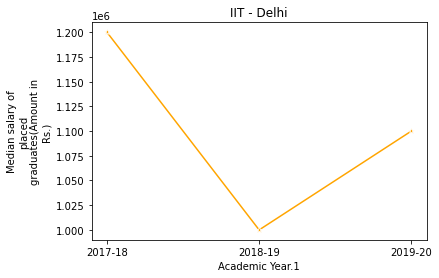

In [100]:
sns.lineplot(x=pl_pg_iitd['Academic Year.1'],y=pl_pg_iitd['Median salary of\nplaced\ngraduates(Amount in\nRs.)'],
             marker='*',color='orange')
plt.title('IIT - Delhi')
plt.show()

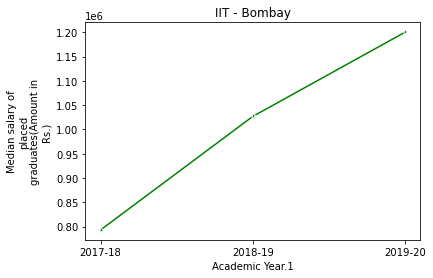

In [101]:
sns.lineplot(x=pl_pg_iitb['Academic Year.1'],y=pl_pg_iitb['Median salary of\nplaced\ngraduates(Amount in\nRs.)'],
             marker='*',color='green')
plt.title('IIT - Bombay')
plt.show()

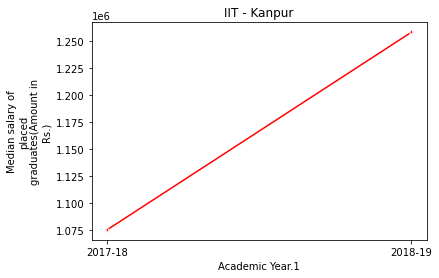

In [102]:
sns.lineplot(x=pl_pg_iitk['Academic Year.1'],y=pl_pg_iitk['Median salary of\nplaced\ngraduates(Amount in\nRs.)'],
             marker='*',color='red')
plt.title('IIT - Kanpur')
plt.show()

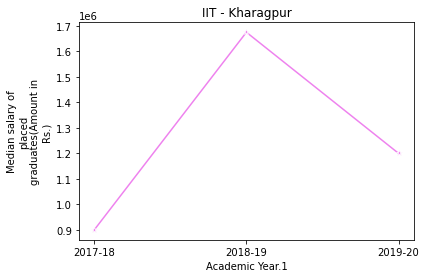

In [103]:
sns.lineplot(x=pl_pg_iitkh['Academic Year.1'],y=pl_pg_iitkh['Median salary of\nplaced\ngraduates(Amount in\nRs.)'],
             marker='*',color='violet')
plt.title('IIT - Kharagpur')
plt.show()

# 3. UG Higher Studies 

In [110]:
pl_ug_iitm.columns

Index(['Unnamed: 0', 'Academic Year',
       'No. of first year\nstudents intake in the\nyear',
       'No. of first year\nstudents admitted in\nthe year', 'Academic Year.1',
       'No. of students\nadmitted through\nLateral entry', 'Academic Year.2',
       'No. of students\ngraduating in\nminimum stipulated\ntime',
       'No. of students\nplaced',
       'Median salary of\nplaced\ngraduates(Amount in\nRs.)',
       'No. of students\nselected for Higher\nStudies'],
      dtype='object')

In [115]:
hgh_iitm = pl_ug_iitm[['Academic Year.2','No. of students\ngraduating in\nminimum stipulated\ntime','No. of students\nplaced',
                      'No. of students\nselected for Higher\nStudies']]
hgh_iitm['Neither Category'] = hgh_iitm['No. of students\ngraduating in\nminimum stipulated\ntime'] -(
    hgh_iitm['No. of students\nplaced'] + hgh_iitm['No. of students\nselected for Higher\nStudies'])

In [127]:
hgh_iitd = pl_ug_iitd[['Academic Year.2','No. of students\ngraduating in\nminimum stipulated\ntime','No. of students\nplaced',
                      'No. of students\nselected for Higher\nStudies']]
hgh_iitd['Neither Category'] = hgh_iitd['No. of students\ngraduating in\nminimum stipulated\ntime'] -(
    hgh_iitd['No. of students\nplaced'] + hgh_iitd['No. of students\nselected for Higher\nStudies'])

In [128]:
hgh_iitb = pl_ug_iitb[['Academic Year.2','No. of students\ngraduating in\nminimum stipulated\ntime','No. of students\nplaced',
                      'No. of students\nselected for Higher\nStudies']]
hgh_iitb['Neither Category'] = hgh_iitb['No. of students\ngraduating in\nminimum stipulated\ntime'] -(
    hgh_iitb['No. of students\nplaced'] + hgh_iitb['No. of students\nselected for Higher\nStudies'])

In [129]:
hgh_iitk = pl_ug_iitk[['Academic Year.2','No. of students\ngraduating in\nminimum stipulated\ntime','No. of students\nplaced',
                      'No. of students\nselected for Higher\nStudies']]
hgh_iitk['Neither Category'] = hgh_iitk['No. of students\ngraduating in\nminimum stipulated\ntime'] -(
    hgh_iitk['No. of students\nplaced'] + hgh_iitk['No. of students\nselected for Higher\nStudies'])

In [130]:
hgh_iitkh = pl_ug_iitkh[['Academic Year.2','No. of students\ngraduating in\nminimum stipulated\ntime','No. of students\nplaced',
                      'No. of students\nselected for Higher\nStudies']]
hgh_iitkh['Neither Category'] = hgh_iitkh['No. of students\ngraduating in\nminimum stipulated\ntime'] -(
    hgh_iitkh['No. of students\nplaced'] + hgh_iitkh['No. of students\nselected for Higher\nStudies'])

In [132]:
lst = [hgh_iitm,hgh_iitd,hgh_iitb,hgh_iitk,hgh_iitkh]

for dataframe in lst:
    
    dataframe.rename(columns={'Academic Year.2' : 'Academic Year',
                              'No. of students\ngraduating in\nminimum stipulated\ntime':'Graduating',
                             'No. of students\nplaced' : 'Placed',
                              'No. of students\nselected for Higher\nStudies' : 'Higher Studies'},inplace=True)
    
    
    dataframe.set_index('Academic Year',inplace=True)

In [133]:
hgh_iitm

,Graduating,Placed,Higher Studies,Neither Category
Academic Year,,,,
2017-18,334,283,51,0
2018-19,362,268,65,29
2019-20,374,286,43,45


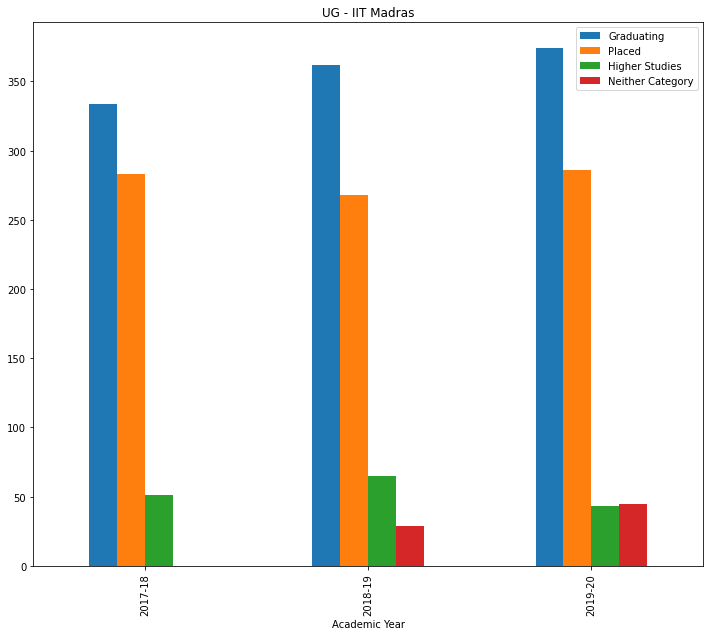

In [145]:

hgh_iitm.plot(kind='bar')
plt.title('UG - IIT Madras')
plt.gcf().set_size_inches(12, 10)
plt.show()

In [137]:
hgh_iitd

,Graduating,Placed,Higher Studies,Neither Category
Academic Year,,,,
2017-18,654,431,70,153
2018-19,615,495,78,42
2019-20,650,511,90,49


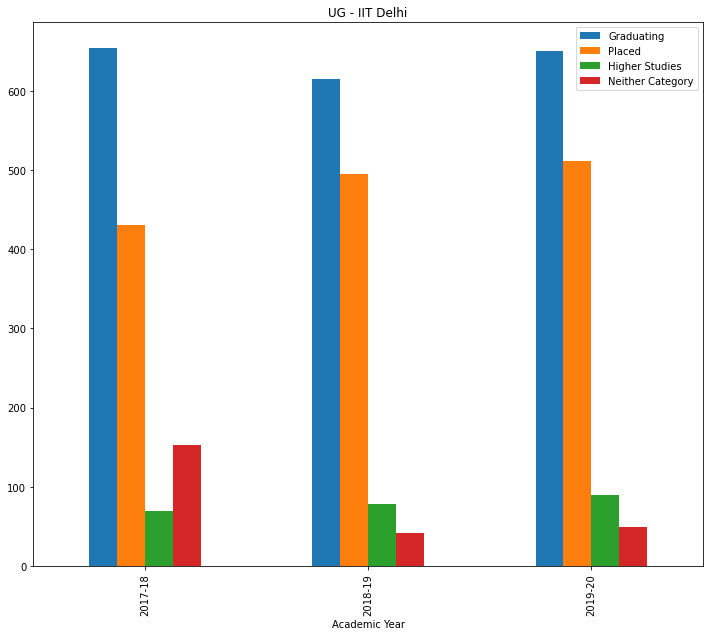

In [146]:

hgh_iitd.plot(kind='bar')
plt.title('UG - IIT Delhi')
plt.gcf().set_size_inches(12, 10)
plt.show()

In [139]:
hgh_iitb

,Graduating,Placed,Higher Studies,Neither Category
Academic Year,,,,
2017-18,572,412,63,97
2018-19,615,430,125,60
2019-20,613,448,116,49


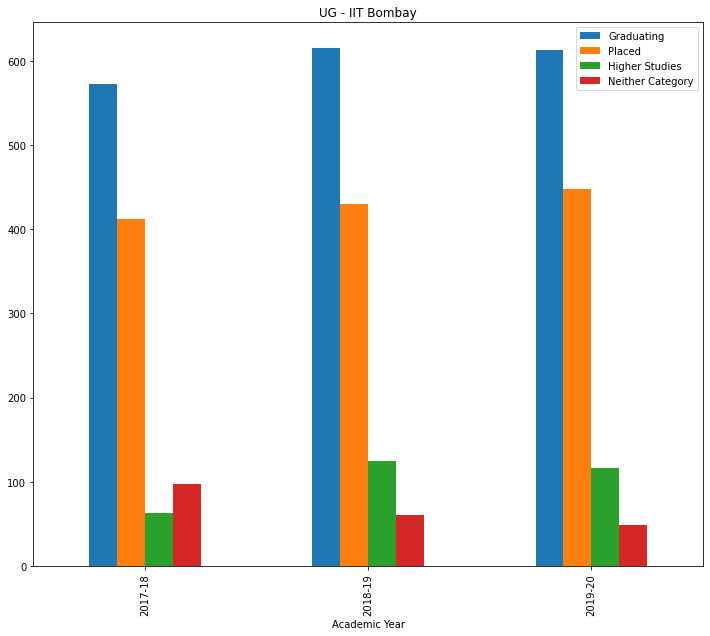

In [147]:

hgh_iitb.plot(kind='bar')
plt.title('UG - IIT Bombay')
plt.gcf().set_size_inches(12, 10)
plt.show()

In [141]:
hgh_iitk

,Graduating,Placed,Higher Studies,Neither Category
Academic Year,,,,
2017-18,789,354,387,48
2018-19,770,437,301,32
2019-20,789,463,325,1


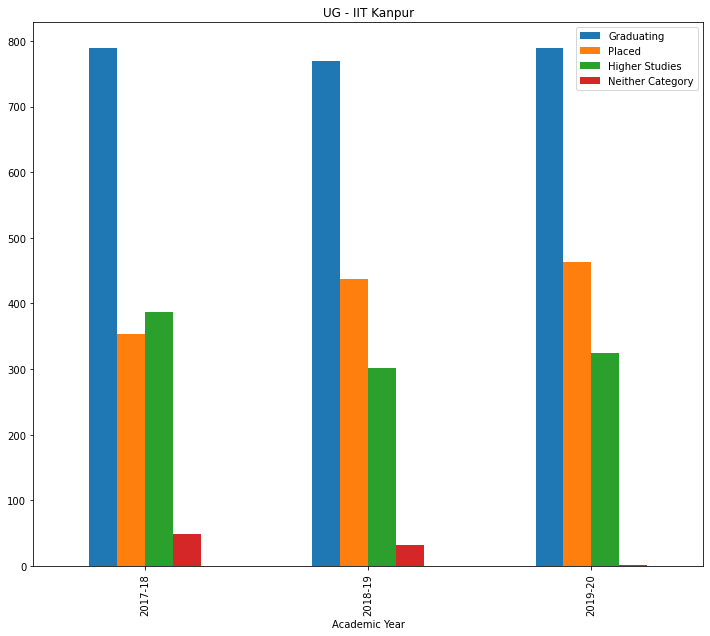

In [148]:

hgh_iitk.plot(kind='bar')
plt.title('UG - IIT Kanpur')
plt.gcf().set_size_inches(12, 10)
plt.show()

In [143]:
hgh_iitkh

,Graduating,Placed,Higher Studies,Neither Category
Academic Year,,,,
2017-18,475,391,44,40
2018-19,535,437,53,45
2019-20,451,416,32,3


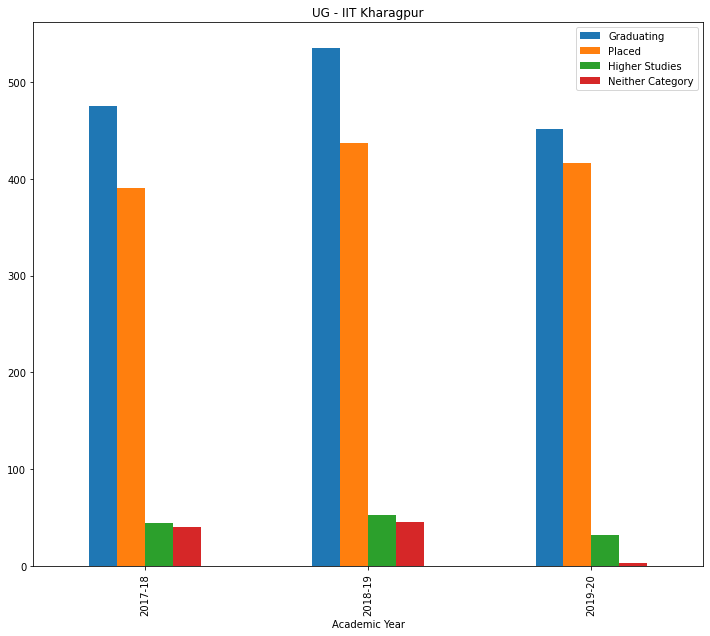

In [149]:

hgh_iitkh.plot(kind='bar')
plt.title('UG - IIT Kharagpur')
plt.gcf().set_size_inches(12, 10)
plt.show()

# 4. PG Higher Studies

In [151]:
pl_pg_iitm.columns

Index(['Unnamed: 0', 'Academic Year',
       'No. of first year\nstudents intake in the\nyear',
       'No. of first year\nstudents admitted in\nthe year', 'Academic Year.1',
       'No. of students graduating in minimum\nstipulated time',
       'No. of students\nplaced',
       'Median salary of\nplaced\ngraduates(Amount in\nRs.)',
       'No. of students\nselected for Higher\nStudies'],
      dtype='object')

In [159]:
pghgh_iitm = pl_pg_iitm[['Academic Year.1','No. of students graduating in minimum\nstipulated time',
                         'No. of students\nplaced',
                        'No. of students\nselected for Higher\nStudies']]

pghgh_iitd = pl_pg_iitd[['Academic Year.1','No. of students graduating in minimum\nstipulated time',
                         'No. of students\nplaced',
                        'No. of students\nselected for Higher\nStudies']]

pghgh_iitb = pl_pg_iitb[['Academic Year.1','No. of students graduating in minimum\nstipulated time',
                         'No. of students\nplaced',
                        'No. of students\nselected for Higher\nStudies']]

pghgh_iitk = pl_pg_iitk[['Academic Year.1','No. of students graduating in minimum\nstipulated time',
                         'No. of students\nplaced',
                        'No. of students\nselected for Higher\nStudies']]

pghgh_iitkh = pl_pg_iitkh[['Academic Year.1','No. of students graduating in minimum\nstipulated time',
                           'No. of students\nplaced',
                        'No. of students\nselected for Higher\nStudies']]

In [160]:
pghgh_iitm

,Academic Year.1,No. of students graduating in minimum\nstipulated time,No. of students\nplaced,No. of students\nselected for Higher\nStudies
0,2017-18,320,289,15
1,2018-19,459,373,21
2,2019-20,302,213,26


In [161]:
df = [pghgh_iitm,pghgh_iitd,pghgh_iitb,pghgh_iitk,pghgh_iitkh]

for dataframes in df:
    
    dataframes.rename(columns={'Academic Year.1' : 'Academic Year',
                              'No. of students graduating in minimum\nstipulated time' : 'Graduating',
                              'No. of students\nplaced' : 'Placed',
                              'No. of students\nselected for Higher\nStudies' : 'Higher Studies'},inplace=True)
    
    dataframes.set_index('Academic Year',inplace=True)
    
    dataframes['Neither Category'] = dataframes['Graduating'] - (dataframes['Placed'] + dataframes['Higher Studies'])

In [162]:
pghgh_iitm

,Graduating,Placed,Higher Studies,Neither Category
Academic Year,,,,
2017-18,320,289,15,16
2018-19,459,373,21,65
2019-20,302,213,26,63


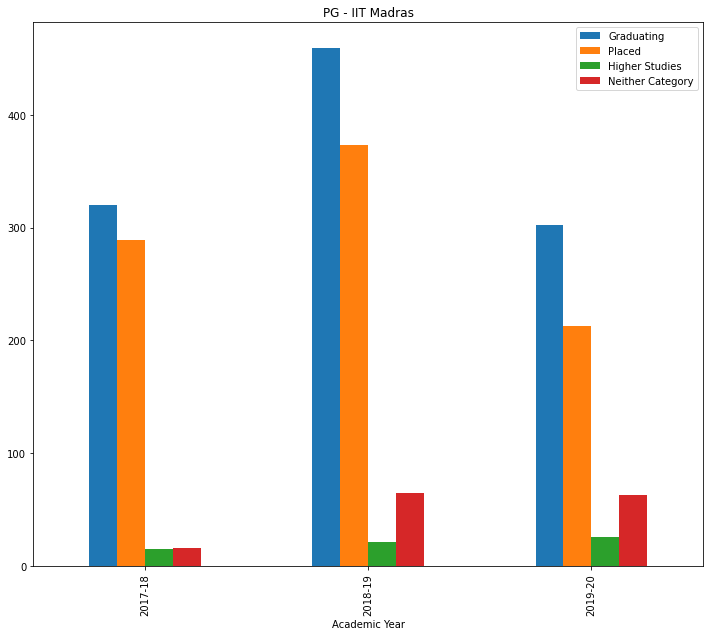

In [163]:

pghgh_iitm.plot(kind='bar')
plt.title('PG - IIT Madras')
plt.gcf().set_size_inches(12, 10)
plt.show()

In [164]:
pghgh_iitd

,Graduating,Placed,Higher Studies,Neither Category
Academic Year,,,,
2017-18,649,219,87,343
2018-19,635,243,91,301
2019-20,653,322,190,141


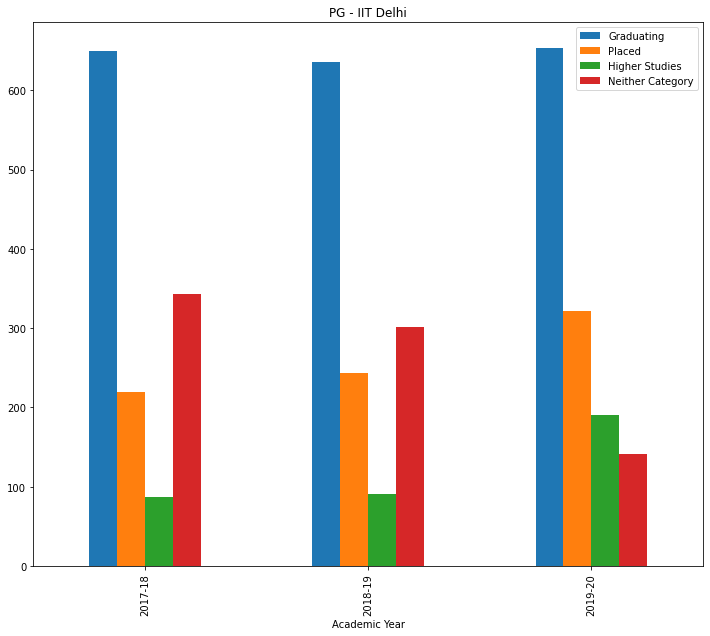

In [165]:

pghgh_iitd.plot(kind='bar')
plt.title('PG - IIT Delhi')
plt.gcf().set_size_inches(12, 10)
plt.show()

In [166]:
pghgh_iitb

,Graduating,Placed,Higher Studies,Neither Category
Academic Year,,,,
2017-18,499,376,0,123
2018-19,456,369,37,50
2019-20,505,343,23,139


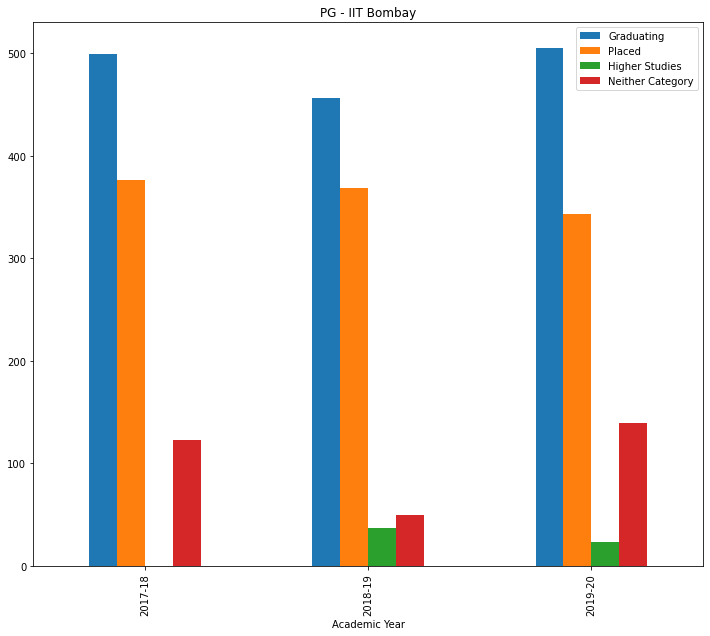

In [167]:

pghgh_iitb.plot(kind='bar')
plt.title('PG - IIT Bombay')
plt.gcf().set_size_inches(12, 10)
plt.show()

In [168]:
pghgh_iitk

,Graduating,Placed,Higher Studies,Neither Category
Academic Year,,,,
2017-18,730,449,225,56
2018-19,704,484,190,30


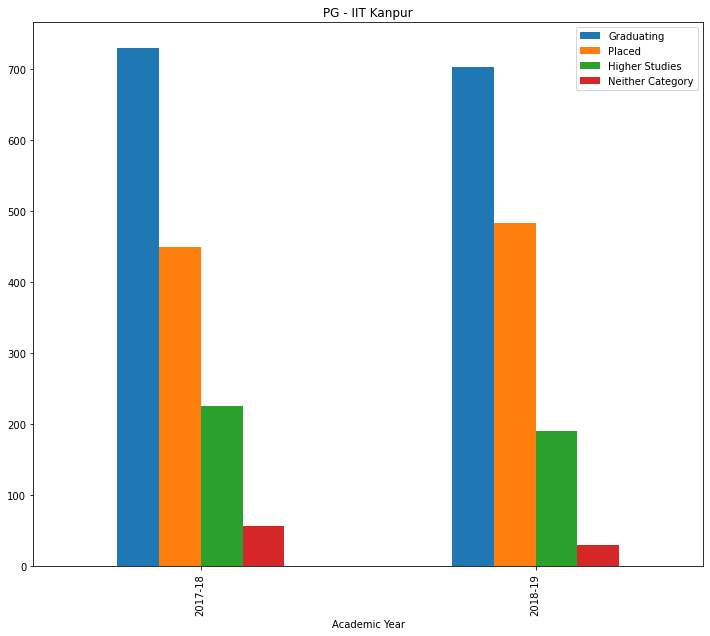

In [169]:

pghgh_iitk.plot(kind='bar')
plt.title('PG - IIT Kanpur')
plt.gcf().set_size_inches(12, 10)
plt.show()

In [170]:
pghgh_iitkh

,Graduating,Placed,Higher Studies,Neither Category
Academic Year,,,,
2017-18,826,418,212,196
2018-19,880,372,159,349
2019-20,814,235,135,444


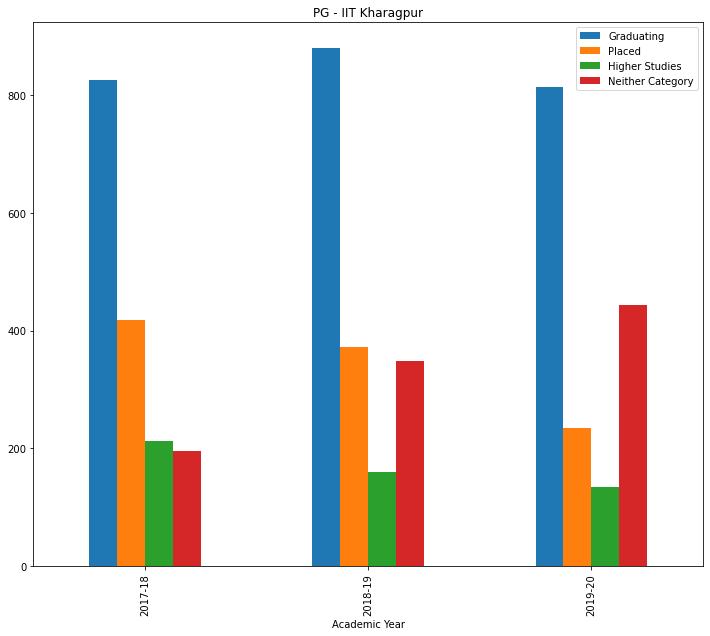

In [171]:

pghgh_iitkh.plot(kind='bar')
plt.title('PG - IIT Kharagpur')
plt.gcf().set_size_inches(12, 10)
plt.show()